## 20MAI0077
## Vivek Dadhich
## Deep Learning Lab DA#6 - Building Autoencoders in Keras
## Github repo link - https://github.com/vivek20dadhich/CSE6037-Deep-Learning-and-its-Applications-Lab-Assignments

<br>

An **autoencoder** is also a neural network. But instead of finding the function mapping the features x to their corresponding values or labels y, it aims to find the function mapping the features x to itself x.

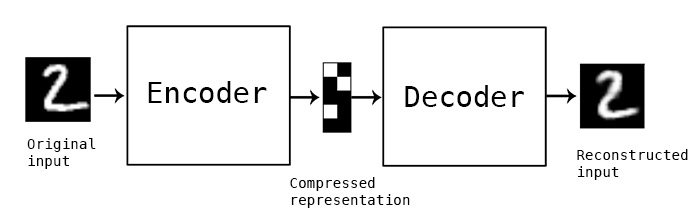

**Encoder** class that inherits the tf.keras.layers.Layer to define it as a layer instead of a model.

The Encoder layer is defined to have a single hidden layer of neurons (self.hidden_layer) to learn the activation of the input features. Then, we connect the hidden layer to a layer (self.output_layer) that encodes the data representation to a lower dimension, which consists of what it thinks as important features. Hence, the “output” of the Encoder layer is the learned data representation z for the input data x.

The **decoder**, is also similar to a feed-forward network. However, instead of reducing data to a lower dimension, it reconstructs the data from its lower dimension representation z to its original dimension x.

The Decoder layer is also defined to have a single hidden layer of neurons to reconstruct the input features from the learned representation by the encoder. Then, we connect its hidden layer to a layer that decodes the data representation from a lower dimension to its original dimension. Hence, the “output” of the decoder layer is the reconstructed data x from the data representation z. Ultimately, the output of the decoder is the autoencoder’s output.

> Like other neural networks, an autoencoder learns through backpropagation. However, instead of comparing the values or labels of the model, we compare the reconstructed data x-hat and the original data x.

<br>

In [2]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3810 - val_loss: 0.1865
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1774 - val_loss: 0.1531
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1487 - val_loss: 0.1340
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1317 - val_loss: 0.1212
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1202 - val_loss: 0.1130
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1128 - val_loss: 0.1075
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1073 - val_loss: 0.1033
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1036 - val_loss: 0.1001
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1005 - val_loss: 0.0977
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0985 - val_lo

In [9]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

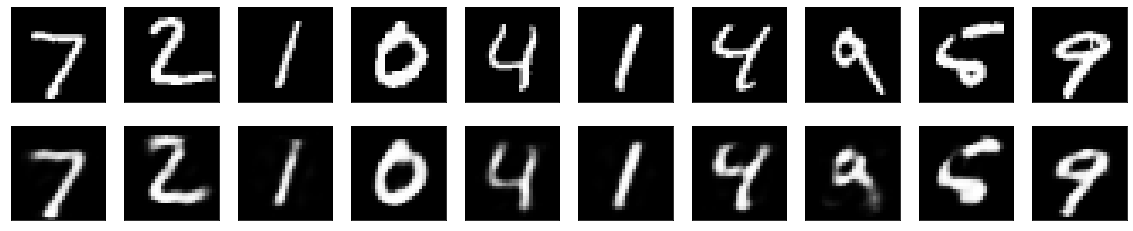

In [10]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()